In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords #for cleaning
from nltk.stem import LancasterStemmer ##for cleaning
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("spam.csv", encoding="latin-1", usecols= ["v1", "v2"])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.columns=["label", "Message"]
df

,label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.describe()

,label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
stop_words = set(stopwords.words('english'))
stemmer = LancasterStemmer()

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["CleanMessage"] = df["Message"].apply(cleaning_data)
df

,label,Message,length,No_of_Characters,No_of_Words,No_of_sentence,CleanMessage
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,155,37,2,free entry wkly comp win cup final tkts may te...
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,148,39,4,freemsg hey darling week word back like fun st...
8,spam,WINNER!! As a valued network customer you have...,158,158,32,5,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,154,154,31,3,mobile months entitled update latest colour mo...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,136,31,3,six chances win cash pounds txt csh send cost ...
...,...,...,...,...,...,...,...
4439,ham,I've got it down to a tea. not sure which flavour,49,49,13,2,got tea sure flavour
1759,ham,Do u ever get a song stuck in your head for no...,107,107,28,1,ever get song stuck head reason away til liste...
2546,ham,Company is very good.environment is terrific a...,70,70,13,1,company good environment terrific food really ...
3882,ham,Gumby's has a special where a &lt;#&gt; \ che...,96,96,29,1,gumby special cheese pizza know doin tonight


In [25]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["CleanMessage"])

# OneHotEncoder for "kind" column
encoder = OneHotEncoder(sparse=False, drop='first')
Y = encoder.fit_transform(df[["label"]])
X_combined = np.hstack((X.toarray(), Y))

print(X_combined)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


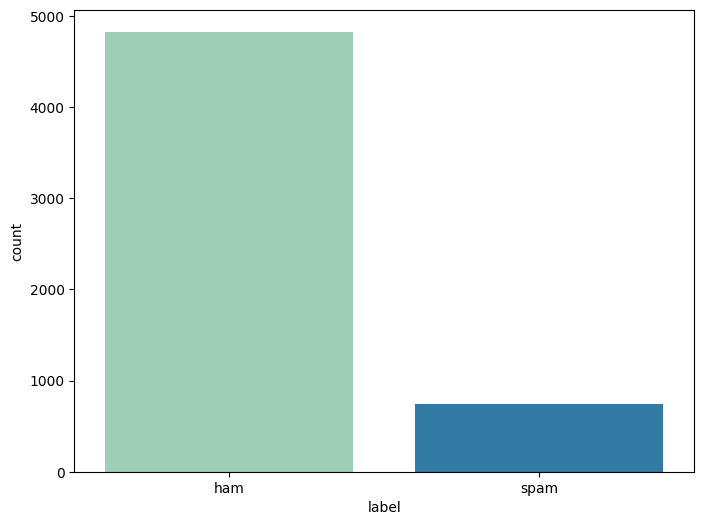

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x="label", data=df, palette="YlGnBu")
plt.show()

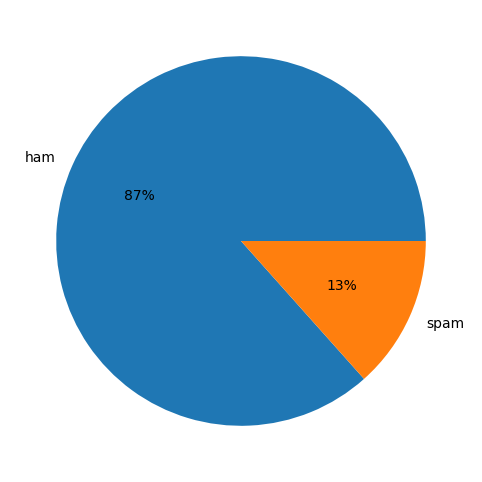

In [10]:
plt.figure(figsize=(8, 6))
kind_counts = df["label"].value_counts()
plt.pie(kind_counts, labels=kind_counts.index, autopct="%0.0f%%")
plt.show()

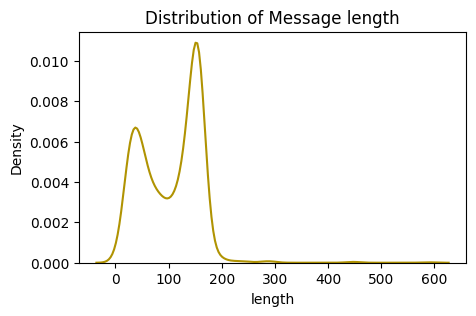

In [11]:
spam = df[df.label=='spam']
ham = df[df.label=='ham'].sample(spam.shape[0])

df = pd.concat([spam, ham], axis=0)
df['length'] = df.Message.apply(len)

fig = plt.figure(figsize=(5, 3))
sns.kdeplot(data=df, x='length', color = '#b09302')
plt.title("Distribution of Message length")
plt.show()

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
df["No_of_Characters"] = df["Message"].apply(len)
df["No_of_Words"]=df.apply(lambda row: nltk.word_tokenize(row["Message"]), axis=1).apply(len)
df["No_of_sentence"]=df.apply(lambda row: nltk.sent_tokenize(row["Message"]), axis=1).apply(len)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
length,1494.0,104.361446,55.978125,3.0,49.0,119.0,153.0,588.0
No_of_Characters,1494.0,104.361446,55.978125,3.0,49.0,119.0,153.0,588.0
No_of_Words,1494.0,22.543507,11.983933,1.0,12.0,25.0,31.0,154.0
No_of_sentence,1494.0,2.421017,1.571297,1.0,1.0,2.0,3.0,18.0


In [26]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

In [27]:
model.score(X_train,Y_train)

0.9824267782426779

In [28]:
y_pred = model.predict(X_test)
y_pred

array([0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1.

In [29]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.939799331103679
